In [138]:
if __name__ == '__main__':
    import sys
    import os
    from pathlib import Path
    curr_file_path = Path(os.path.abspath(''))
    sys.path.append(str(curr_file_path.parent))

import numpy as np
import glob2 as glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
from sklearn.decomposition import PCA
from agents.networks.gru_rnn import GRU_RNN

In [139]:
HIDDEN_SIZE = 4
INPUT_SIZE = 1
DEVICE = 'cuda'
LEARNING_RATE = 1e-3
VAR_NOISE = 1e-4

In [140]:
network_untrained = GRU_RNN(
    input_size=INPUT_SIZE,
    hidden_size=HIDDEN_SIZE,
    device=DEVICE,
    var_noise=VAR_NOISE,
)

load_path = '../../results/line_attr_supervised/5_unit_line_2024-12-04_14_05_12_930912_var_noise_0.0001_activity_weight_1e-07/rnn_weights/000099.h5'
network_untrained.load_state_dict(torch.load(load_path, weights_only=True))

<All keys matched successfully>

In [141]:
w_hh_untrained = network_untrained.rnn.weight_hh.detach().cpu().numpy()
b_hh_untrained = network_untrained.rnn.bias_hh.detach().cpu().numpy()
w_ih_untrained = network_untrained.rnn.weight_ih.detach().cpu().numpy()
b_ih_untrained = network_untrained.rnn.bias_ih.detach().cpu().numpy()

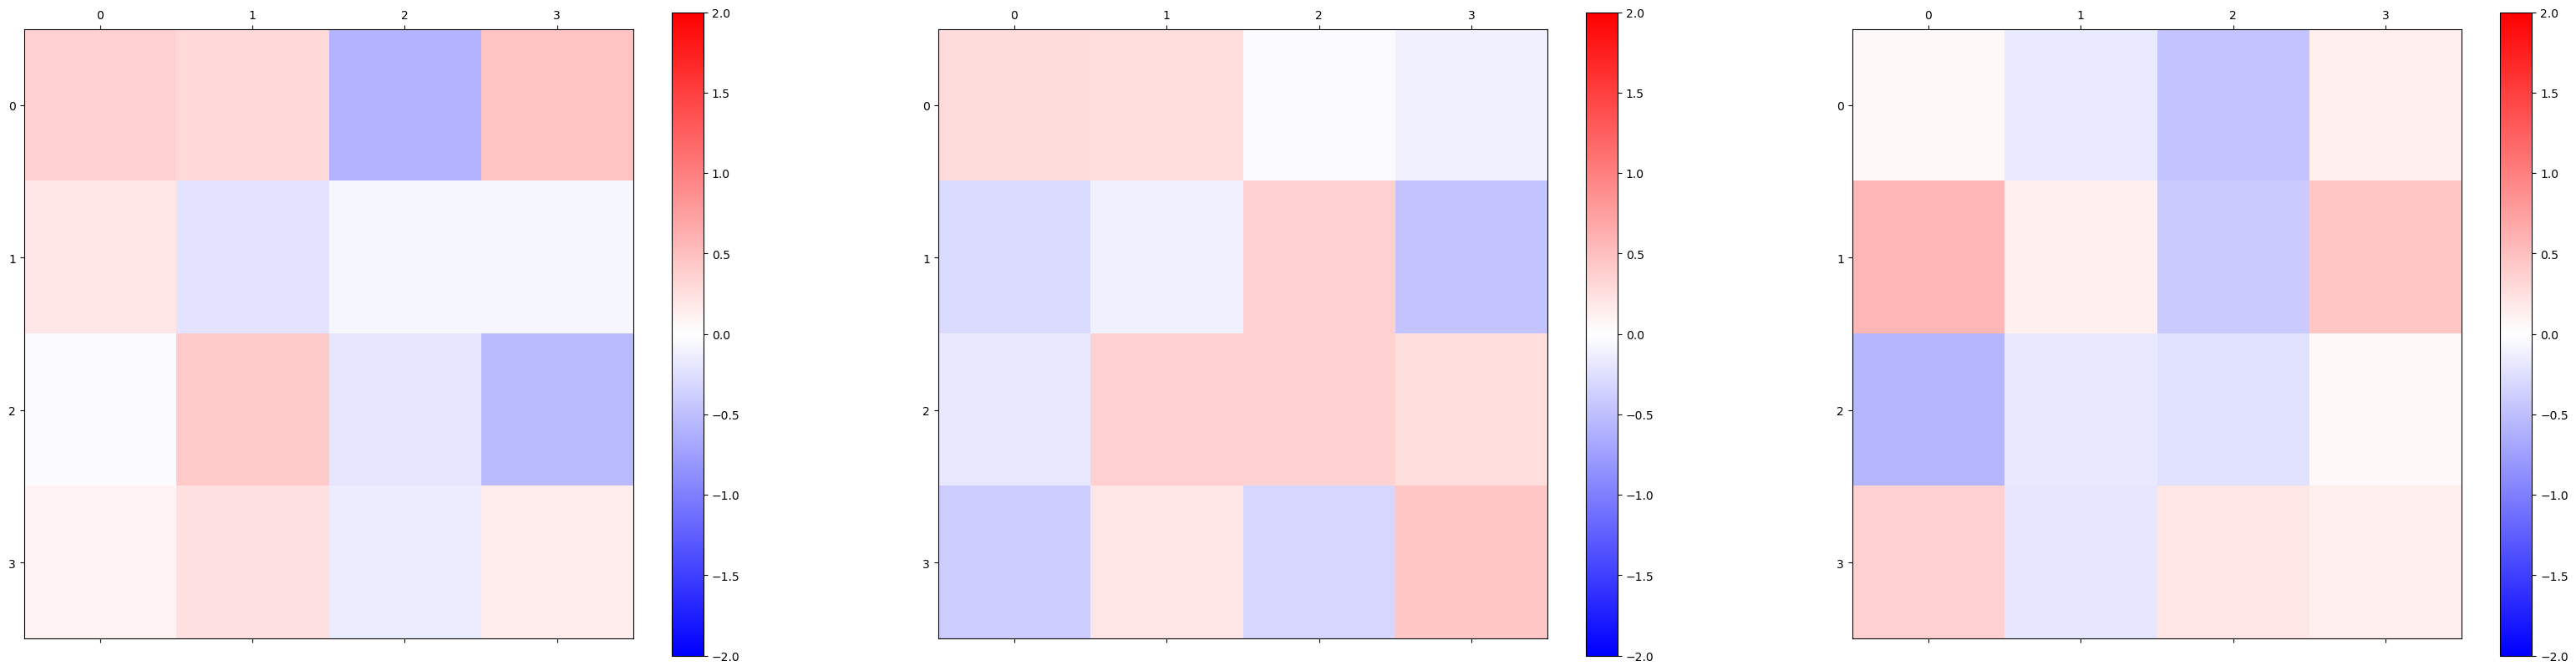

In [142]:
scale = 10
fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))

m = 2
for k in range(3):
    cbar = axs[k].matshow(w_hh_untrained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE], vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)

In [183]:
network_trained = GRU_RNN(
    input_size=INPUT_SIZE,
    hidden_size=HIDDEN_SIZE,
    device=DEVICE,
    var_noise=VAR_NOISE,
)

load_path = '../../results/line_attr_supervised/5_unit_line_2024-12-04_14_05_12_930912_var_noise_0.0001_activity_weight_1e-07/rnn_weights/009999.h5'
network_trained.load_state_dict(torch.load(load_path, weights_only=True))

<All keys matched successfully>

In [184]:
w_ih_trained = network_trained.rnn.weight_ih.detach().cpu().numpy()

Text(0.5, 1.0, 'W_ih_n')

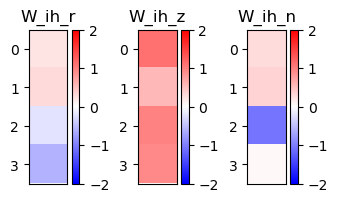

In [210]:
scale = 2
fig, axs = plt.subplots(1, 3, figsize=(2 * scale, 1 * scale))

m = 2
for k in range(3):
    cbar = axs[k].matshow(w_ih_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE], vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)
    axs[k].set_xticks([])

axs[0].set_title('W_ih_r')
axs[1].set_title('W_ih_z')
axs[2].set_title('W_ih_n')

In [146]:
w_hh_trained = network_trained.rnn.weight_hh.detach().cpu().numpy()
b_hh_trained = network_trained.rnn.bias_hh.detach().cpu().numpy()
w_ih_trained = network_trained.rnn.weight_ih.detach().cpu().numpy()
b_ih_trained = network_trained.rnn.bias_ih.detach().cpu().numpy()

Text(0.5, 1.0, 'W_hh_n')

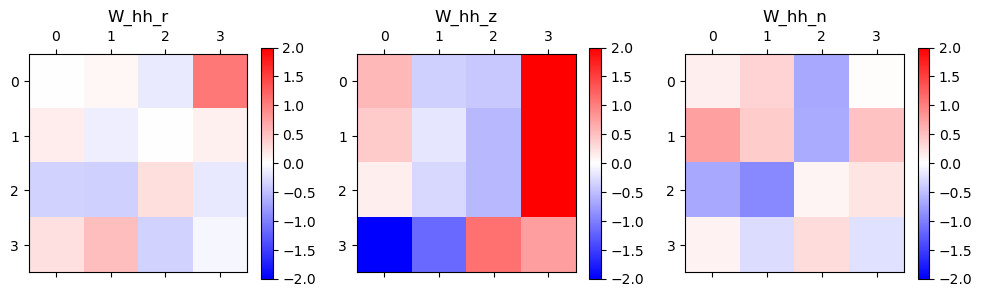

In [211]:
scale = 3
fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))

m = 2

for k in range(3):
    cbar = axs[k].matshow(w_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE], vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)

axs[0].set_title('W_hh_r')
axs[1].set_title('W_hh_z')
axs[2].set_title('W_hh_n')

In [190]:
w_hh_trained_r = w_hh_trained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE, :]
w_hh_trained_z = w_hh_trained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE, :]
w_hh_trained_n = w_hh_trained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE, :]

w_hh_untrained_r = w_hh_untrained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE, :]
w_hh_untrained_z = w_hh_untrained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE, :]
w_hh_untrained_n = w_hh_untrained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE, :]

b_hh_trained_r = b_hh_trained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE]
b_hh_trained_z = b_hh_trained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE]
b_hh_trained_n = b_hh_trained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE]

b_hh_untrained_r = b_hh_untrained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE]
b_hh_untrained_z = b_hh_untrained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE]
b_hh_untrained_n = b_hh_untrained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE]

w_ih_trained_r = w_ih_trained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE, :]
w_ih_trained_z = w_ih_trained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE, :]
w_ih_trained_n = w_ih_trained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE, :]

w_ih_untrained_r = w_ih_untrained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE, :]
w_ih_untrained_z = w_ih_untrained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE, :]
w_ih_untrained_n = w_ih_untrained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE, :]

b_ih_trained_r = b_ih_trained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE]
b_ih_trained_z = b_ih_trained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE]
b_ih_trained_n = b_ih_trained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE]

b_ih_untrained_r = b_ih_untrained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE]
b_ih_untrained_z = b_ih_untrained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE]
b_ih_untrained_n = b_ih_untrained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE]

[[ 0.5619212  -0.3696214  -0.43343273  3.1759312 ]
 [ 0.41127175 -0.19578655 -0.55331403  2.4880955 ]
 [ 0.1352699  -0.30742976 -0.5522888   2.2490468 ]
 [-2.1356277  -1.1593872   1.11204     0.7588628 ]]
(0.4684249+2.6265655j)
[0.597173  +0.j         0.45680273+0.02048472j 0.3954388 +0.09970488j
 0.08955065+0.5098665j ]
(0.4684249-2.6265655j)
[0.597173  -0.j         0.45680273-0.02048472j 0.3954388 -0.09970488j
 0.08955065-0.5098665j ]
(-0.4207831+0j)
[-0.21971224+0.j -0.4987403 +0.j -0.8320155 +0.j -0.10360919+0.j]
(0.056641977+0j)
[-0.36334723+0.j  0.9044848 +0.j  0.13094106+0.j  0.18094312+0.j]


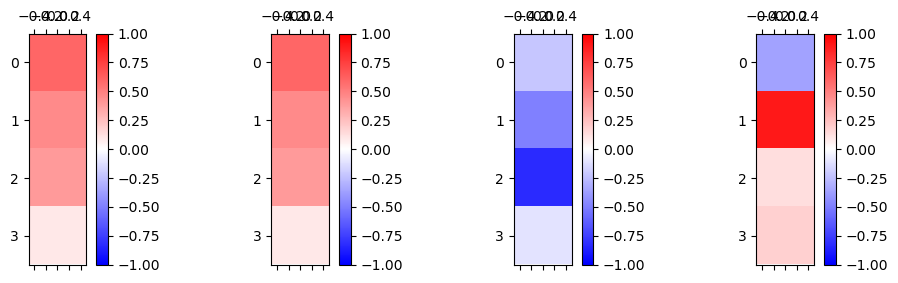

In [200]:
print(w_hh_trained_z)
scale = 3
fig, axs = plt.subplots(1, 4, figsize=(4 * scale, 1 * scale))
res = np.linalg.eig(w_hh_trained_z)
m = 1
for i in range(4):
    print(res.eigenvalues[i])
    print(res.eigenvectors[:, i])
    cbar = axs[i].matshow(np.real(res.eigenvectors[:, i]).reshape(HIDDEN_SIZE, 1), vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)

Text(0.5, 1.0, 'b_hh_n')

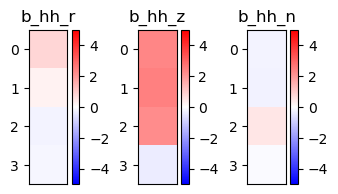

In [212]:
scale = 2
fig, axs = plt.subplots(1, 3, figsize=(2 * scale, 1 * scale))

m = 5

for k in range(3):
    cbar = axs[k].matshow(b_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE].reshape(HIDDEN_SIZE, 1), vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)
    axs[k].set_xticks([])

axs[0].set_title('b_hh_r')
axs[1].set_title('b_hh_z')
axs[2].set_title('b_hh_n')

Text(0.5, 1.0, 'b_ih_n')

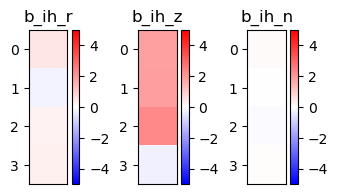

In [213]:
scale = 2
fig, axs = plt.subplots(1, 3, figsize=(2 * scale, 1 * scale))

m = 5

for k in range(3):
    cbar = axs[k].matshow(b_ih_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE].reshape(HIDDEN_SIZE, 1), vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)
    axs[k].set_xticks([])

axs[0].set_title('b_ih_r')
axs[1].set_title('b_ih_z')
axs[2].set_title('b_ih_n')

In [156]:
def load_hidden_activity(data_path, averaging_size=1):
    file_names = glob.glob(data_path)
    data = []
    for file_name in file_names:
        data_for_file = np.load(file_name)
        data.append(data_for_file)
    data = np.concatenate(data, axis=0)
    if averaging_size == 1:
        return data
    reduced_data = np.empty((data.shape[0], int(data.shape[1] / averaging_size)))
    for k in range(0, int(data.shape[1] / averaging_size) * averaging_size, averaging_size):
        reduced_data[:, int(k / averaging_size)] = data[:, k:k + averaging_size].mean(axis=1)
    return reduced_data

In [160]:
data = load_hidden_activity(
    '../../results/line_attr_supervised/4_unit_markov_fully_trained_2024-12-05_16_15_37_285567_var_noise_0.0001_activity_weight_1e-07/hidden_states/*.npy'
)

In [161]:
print(data.shape)

(2000, 4, 1000)


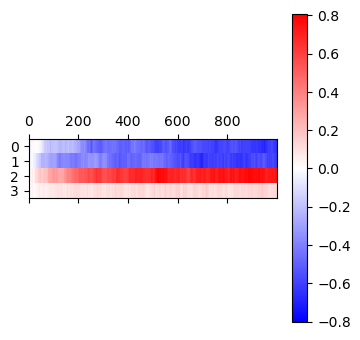

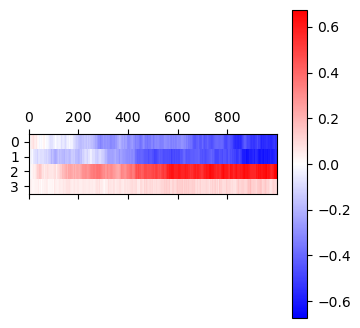

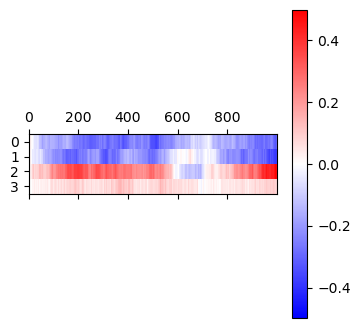

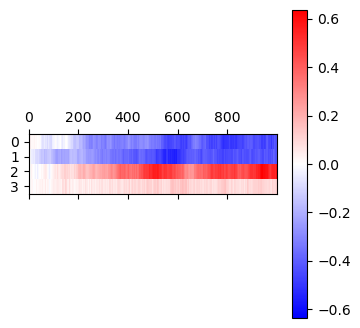

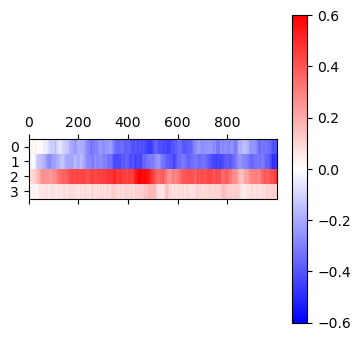

In [162]:
for k in range(0, 100, 20):
    hidden_activity = data[k, ...]
    
    scale = 1
    fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))
    
    m = np.abs(hidden_activity).max()
    cbar = axs.matshow(hidden_activity, vmin=-m, vmax=m, cmap='bwr', aspect=60)
    plt.colorbar(cbar)

In [163]:
data_ = np.transpose(data, [1, 0, 2])
flattened_data = data_.reshape(data_.shape[0], data_.shape[1] * data_.shape[2])
print(data_.shape)
print(flattened_data.shape)
pca = PCA()
pc_activities = pca.fit_transform(flattened_data.T)
pc_activities = pc_activities.T.reshape(data_.shape)
print(pc_activities.shape)
explained_variance_ratios = pca.explained_variance_ratio_

(4, 2000, 1000)
(4, 2000000)
(4, 2000, 1000)


Text(0.5, 0, 'PC')

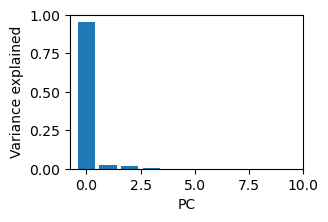

In [204]:
scale = 0.5
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.bar(np.arange(explained_variance_ratios.shape[0]), explained_variance_ratios)
axs.set_xlim(-0.75, 10)
axs.set_ylabel('Variance explained')
axs.set_xlabel('PC')

In [177]:
def load_numpy(data_path, averaging_size=1):
    file_names = glob.glob(data_path)
    data = []
    for file_name in file_names:
        data_for_file = np.load(file_name)
        data.append(data_for_file)
    data = np.concatenate(data, axis=0)
    if averaging_size == 1:
        return data
    reduced_data = np.empty((data.shape[0], int(data.shape[1] / averaging_size)))
    for k in range(0, int(data.shape[1] / averaging_size) * averaging_size, averaging_size):
        reduced_data[:, int(k / averaging_size)] = data[:, k:k + averaging_size].mean(axis=1)
    return reduced_data

In [178]:
output_data = load_numpy(
    '../../results/line_attr_supervised/4_unit_markov_fully_trained_2024-12-05_16_15_37_285567_var_noise_0.0001_activity_weight_1e-07/outputs/*.npy'
)

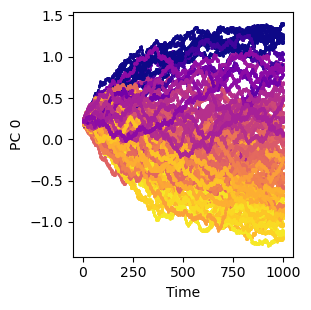

In [206]:
scale = 0.8
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))

cmap = mpl.colormaps['plasma']
colors = cmap(np.linspace(0, 1, 100))

for trans_mat_idx in range(20):
    for run_idx in range(0, 100, 20):
        for k in np.arange(0, 2, 2):
            cbar = axs.scatter(
                np.arange(data.shape[2]),
                pc_activities[k, run_idx + trans_mat_idx * 100, :],
                s=1,
                color=colors[int(output_data[2 * trans_mat_idx + 1, run_idx] * 100)],
                # vmax=2,
            )
axs.set_xlabel(f'Time')
axs.set_ylabel(f'PC 0')
fig.tight_layout()

[ 0.4543168   0.60356957 -0.63348454 -0.16732402]
[0.8618826]


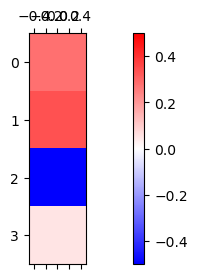

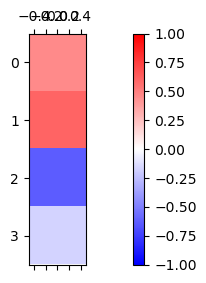

In [180]:
scale = 3
m = 0.5
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
w_ih_trained_n_ = w_ih_trained_n.reshape(HIDDEN_SIZE, 1)
cbar = axs.matshow(w_ih_trained_n_, vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

eigenvectors = np.linalg.eig(w_hh_trained_n).eigenvectors
print(np.real(eigenvectors[:, 0]))
scale = 3
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
m = 1
cbar = axs.matshow(np.real(eigenvectors[:, 0]).reshape(HIDDEN_SIZE, 1), vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

print(np.dot(np.real(eigenvectors[:, 0]), w_ih_trained_n_ / np.linalg.norm(w_ih_trained_n_)))

Text(0, 0.5, '$y$')

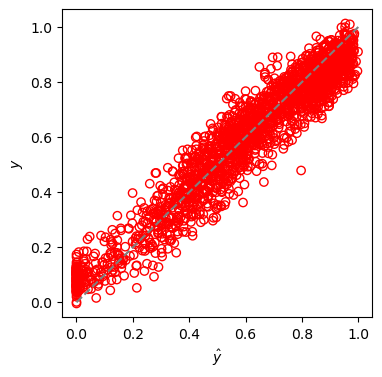

In [203]:
scale = 1
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))

for k in range(0, output_data.shape[0], 2):
    y = output_data[k, ...]
    y_targ = output_data[k+1, ...]

    cbar = axs.scatter(y_targ, y, facecolor='None', edgecolor='red')
axs.plot([0, 1], [0, 1], '--', c='gray')
axs.set_xlabel(r'$\hat{y}$')
axs.set_ylabel(r'$y$')